### Python Libraries and Modules Import

In [1]:
!pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob


from wordcloud import WordCloud
from warnings import filterwarnings


In [2]:
restaurant_df = pd.read_csv("Restaurant_Reviews.tsv", sep="\t")
restaurant_df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
#converting into lowercase
restaurant_df['Review'] = restaurant_df['Review'].str.lower()
restaurant_df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [5]:
#Cleaning the Punctuations

def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

restaurant_df['Review'] = restaurant_df['Review'].apply(clean_text)
restaurant_df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [6]:
#removing prepositions
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

restaurant_df['Review'] = restaurant_df['Review'].apply(remove_stopwords)
restaurant_df.head()

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


In [7]:
#removing Rarewords
dropping = pd.Series(' '.join(restaurant_df['Review']).split()).value_counts()[-250:]
restaurant_df['Review'] = restaurant_df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in dropping))
restaurant_df.head()    

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


In [8]:
#Tokenization
restaurant_df['Review'].apply(lambda x: TextBlob(x).words).head()

0                                  [wow, loved, place]
1                                        [crust, good]
2                              [tasty, texture, nasty]
3    [stopped, late, may, bank, holiday, rick, stev...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

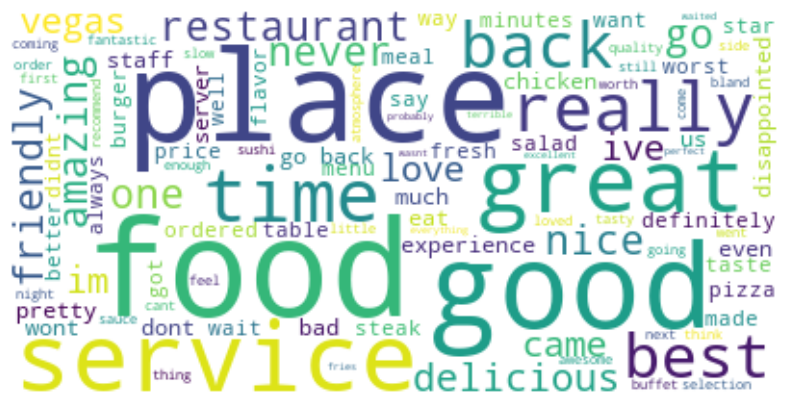

In [9]:
#creating Word cloud of the most used words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Defining the text variable
text = " ".join(review for review in restaurant_df["Review"])

# Creating cloud object
wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="white").generate(text)

# plotting the Wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# WordCloud'u dosyaya kaydet
wordcloud.to_file("wordcloud.png")

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
#Sentiment analysis

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The food was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [12]:
restaurant_df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.115, 'pos': 0.885, 'comp...
1    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
2    {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...
3    {'neg': 0.131, 'neu': 0.414, 'pos': 0.455, 'co...
4    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
5    {'neg': 0.645, 'neu': 0.215, 'pos': 0.14, 'com...
6    {'neg': 0.395, 'neu': 0.605, 'pos': 0.0, 'comp...
7    {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
8    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
9    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
Name: Review, dtype: object

In [13]:
restaurant_df["polarity_score"] = restaurant_df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
restaurant_df.head(11)

,Review,Liked,polarity_score
0,wow loved place,1,0.8271
1,crust good,0,0.4404
2,tasty texture nasty,0,-0.5574
3,stopped late may bank holiday rick steve recom...,1,0.6908
4,selection menu great prices,1,0.6249
5,getting angry want damn pho,0,-0.6908
6,honeslty didnt taste fresh,0,-0.2411
7,potatoes like rubber could tell made ahead tim...,0,0.5719
8,fries great,1,0.6249
9,great touch,1,0.6249


In [14]:
#Mapping to positive, negative, and neutral based on polarity score
restaurant_df["Review"][0:11].apply(lambda x: "positive" if sia.polarity_scores(x)["compound"] > 0 else ("negative" if sia.polarity_scores(x)["compound"] < 0 else "neutral"))

0     positive
1     positive
2     negative
3     positive
4     positive
5     negative
6     negative
7     positive
8     positive
9     positive
10     neutral
Name: Review, dtype: object

In [15]:
restaurant_df["sentiment_label"] = restaurant_df["Review"].apply(lambda x: "positive" if sia.polarity_scores(x)["compound"] > 0 else ("negative" if sia.polarity_scores(x)["compound"] < 0 else "neutral"))
restaurant_df.head(11)
     

,Review,Liked,polarity_score,sentiment_label
0,wow loved place,1,0.8271,positive
1,crust good,0,0.4404,positive
2,tasty texture nasty,0,-0.5574,negative
3,stopped late may bank holiday rick steve recom...,1,0.6908,positive
4,selection menu great prices,1,0.6249,positive
5,getting angry want damn pho,0,-0.6908,negative
6,honeslty didnt taste fresh,0,-0.2411,negative
7,potatoes like rubber could tell made ahead tim...,0,0.5719,positive
8,fries great,1,0.6249,positive
9,great touch,1,0.6249,positive
